# 1. 데이터 불러오기

In [73]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import statsmodels.graphics.api as smg
import seaborn as sns
from scipy import stats

df = pd.read_csv('data_housing_price.csv', index_col = 0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2. 데이터 전처리
## 2-1. 범주형 변수 처리

In [74]:
# Find categories
pd.unique(df['MSZoning'])
df.groupby('MSZoning').mean()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSZoning,,,,,,,,,,,,,,,,,,,,,
C (all),56.000000,69.700000,9501.300000,3.900000,4.600000,1924.100000,1958.200000,0.000000,222.800000,0.000000,...,9.800000,64.400000,82.500000,0.000000,9.900000,0.000000,61.400000,7.700000,2008.300000,74528.000000
FV,90.461538,59.491228,6638.861538,7.200000,5.030769,2004.507692,2004.830769,140.806452,327.892308,0.000000,...,57.276923,103.476923,0.000000,0.000000,3.046154,0.000000,0.000000,6.276923,2007.846154,214014.061538
RH,80.312500,58.923077,7380.062500,5.250000,5.562500,1945.687500,1971.937500,57.812500,312.750000,8.687500,...,67.625000,28.250000,58.687500,0.000000,0.000000,0.000000,0.000000,7.500000,2007.500000,131558.375000
RL,49.374457,74.680043,11571.814075,6.190269,5.535187,1975.461338,1985.659427,112.260908,492.514335,53.476108,...,105.133797,45.141616,16.892268,4.192007,16.841877,3.499566,47.749783,6.317116,2007.824500,191004.994787
RM,84.931193,52.366834,6379.775229,5.454128,5.995413,1943.256881,1976.894495,56.169725,239.839450,28.770642,...,53.600917,38.275229,49.752294,0.701835,10.582569,0.000000,36.330275,6.211009,2007.761468,126316.830275


In [75]:
# integer encoding
df['MSZoning']=df['MSZoning'].replace('C (all)', 0)   # C Commercial
df['MSZoning']=df['MSZoning'].replace('RM', 1)        # RM Residential Medium Density
df['MSZoning']=df['MSZoning'].replace('RH', 2)        # RH Residential High Density
df['MSZoning']=df['MSZoning'].replace('RL', 3)        # RL Residential Low Density
df['MSZoning']=df['MSZoning'].replace('FV', 4)        # FV Floating Village Residential
df.groupby('MSZoning').mean()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSZoning,,,,,,,,,,,,,,,,,,,,,
0,56.000000,69.700000,9501.300000,3.900000,4.600000,1924.100000,1958.200000,0.000000,222.800000,0.000000,...,9.800000,64.400000,82.500000,0.000000,9.900000,0.000000,61.400000,7.700000,2008.300000,74528.000000
1,84.931193,52.366834,6379.775229,5.454128,5.995413,1943.256881,1976.894495,56.169725,239.839450,28.770642,...,53.600917,38.275229,49.752294,0.701835,10.582569,0.000000,36.330275,6.211009,2007.761468,126316.830275
2,80.312500,58.923077,7380.062500,5.250000,5.562500,1945.687500,1971.937500,57.812500,312.750000,8.687500,...,67.625000,28.250000,58.687500,0.000000,0.000000,0.000000,0.000000,7.500000,2007.500000,131558.375000
3,49.374457,74.680043,11571.814075,6.190269,5.535187,1975.461338,1985.659427,112.260908,492.514335,53.476108,...,105.133797,45.141616,16.892268,4.192007,16.841877,3.499566,47.749783,6.317116,2007.824500,191004.994787
4,90.461538,59.491228,6638.861538,7.200000,5.030769,2004.507692,2004.830769,140.806452,327.892308,0.000000,...,57.276923,103.476923,0.000000,0.000000,3.046154,0.000000,0.000000,6.276923,2007.846154,214014.061538


## 2-2. 변수의 상관계수 분석

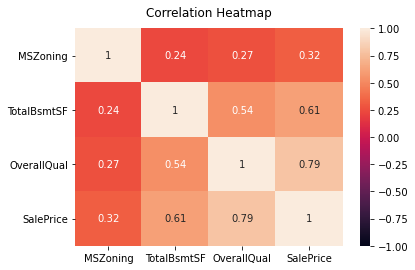

## 2-3. 산점도

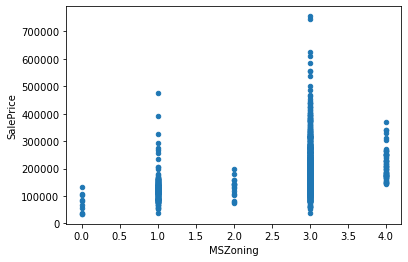

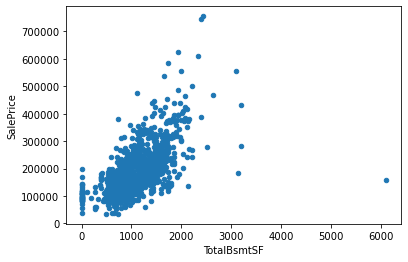

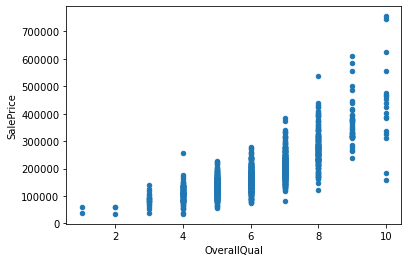

## 2-4. 표준화

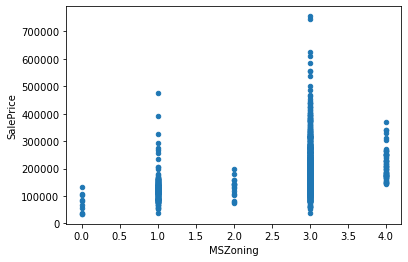

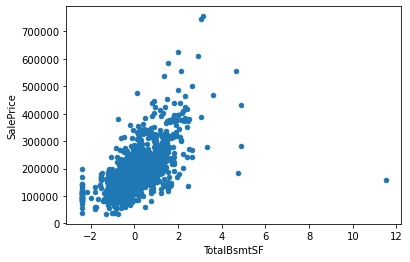

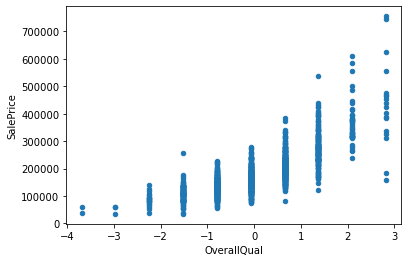

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df[['TotalBsmtSF','OverallQual']])
df[['TotalBsmtSF','OverallQual']] = scaler.transform(df[['TotalBsmtSF','OverallQual']])

# 3. 회귀 분석
## 3-1. 회귀식 도출

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     529.9
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        08:22:05   Log-Likelihood:                -17698.
No. Observations:                1460   AIC:                         3.541e+04
Df Residuals:                    1453   BIC:                         3.545e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
C(MSZoning)[0]  1.681e+05   1.42e+04     11.

## 3-2. 해석

In [ ]:
y(c)  = 168100 + 19010 x2 + 50980 x3 # C Commercial
y(RM) = 161300 + 19010 x2 + 50980 x3 # RM Residential Medium Density
y(RH) = 172800 + 19010 x2 + 50980 x3 # RH Residential High Density
y(RL) = 185100 + 19010 x2 + 50980 x3 # RL Residential Low Density
y(FV) = 176300 + 19010 x2 + 50980 x3 # FV Floating Village Residential       

## 3-3. 예측

In [82]:
new_value = {'MSZoning':[3],       # RL
             'TotalBsmtSF': [900], # 900 square feet
             'OverallQual':[7]}    # score 7
X = pd.DataFrame(new_value)
X[['TotalBsmtSF','OverallQual']]=scaler.transform(X[['TotalBsmtSF','OverallQual']])
ypred = result.predict(X)
print("예상 주택 가격 = $ %f" %(ypred))

예상 주택 가격 = $ 211506.537569
